# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 


Following is to show how to plot to a file to save a graph:

In [1]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [23]:
# Read your data here; 
library(dplyr)
library(ggplot2)
library(lubridate)
library(RColorBrewer)

eqdata = read.csv('earthquakedata.csv')
head(eqdata)


Date,Time,Latitude,Longitude,Type,Depth,Depth.Error,Depth.Seismic.Stations,Magnitude,Magnitude.Type,⋯,Magnitude.Seismic.Stations,Azimuthal.Gap,Horizontal.Distance,Horizontal.Error,Root.Mean.Square,ID,Source,Location.Source,Magnitude.Source,Status
<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<fct>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NA,NA,6.0,MW,⋯,NA,NA,NA,NA,NA,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NA,NA,5.8,MW,⋯,NA,NA,NA,NA,NA,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NA,NA,6.2,MW,⋯,NA,NA,NA,NA,NA,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NA,NA,5.8,MW,⋯,NA,NA,NA,NA,NA,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NA,NA,5.8,MW,⋯,NA,NA,NA,NA,NA,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NA,NA,6.7,MW,⋯,NA,NA,NA,NA,NA,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
mydata <- filter(eqdata,Type == 'Earthquake')

In [4]:
mydata$Date <- as.Date(mydata$Date, format='%m/%d/%Y')
mydata$Year <- year(mydata$Date)

In [5]:
mydata$Decade <- mydata$Year - mydata$Year %% 10

In [6]:
mydata1 <- subset(mydata, select=c(Latitude, Longitude, Depth, Magnitude,Year,Decade))
head(mydata1)
tail(mydata1)

Latitude,Longitude,Depth,Magnitude,Year,Decade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.246,145.616,131.6,6.0,1965,1960
1.863,127.352,80.0,5.8,1965,1960
-20.579,-173.972,20.0,6.2,1965,1960
-59.076,-23.557,15.0,5.8,1965,1960
11.938,126.427,15.0,5.8,1965,1960
-13.405,166.629,35.0,6.7,1965,1960


,Latitude,Longitude,Depth,Magnitude,Year,Decade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23227,38.3754,-118.8977,10.80,5.6,2016,2010
23228,38.3917,-118.8941,12.30,5.6,2016,2010
23229,38.3777,-118.8957,8.80,5.5,2016,2010
23230,36.9179,140.4262,10.00,5.9,2016,2010
23231,-9.0283,118.6639,79.00,6.3,2016,2010
23232,37.3973,141.4103,11.94,5.5,2016,2010


In [7]:
summary(mydata1)
str(mydata1)

    Latitude         Longitude           Depth          Magnitude    
 Min.   :-77.080   Min.   :-180.00   Min.   : -1.10   Min.   :5.500  
 1st Qu.:-18.720   1st Qu.: -76.37   1st Qu.: 15.00   1st Qu.:5.600  
 Median : -3.680   Median : 106.35   Median : 33.00   Median :5.700  
 Mean   :  1.386   Mean   :  39.75   Mean   : 71.31   Mean   :5.883  
 3rd Qu.: 24.968   3rd Qu.: 145.29   3rd Qu.: 54.80   3rd Qu.:6.000  
 Max.   : 86.005   Max.   : 180.00   Max.   :700.00   Max.   :9.100  
                                                                     
      Year          Decade    
 Min.   :1965   Min.   :1960  
 1st Qu.:1981   1st Qu.:1980  
 Median :1994   Median :1990  
 Mean   :1993   Mean   :1988  
 3rd Qu.:2005   3rd Qu.:2000  
 Max.   :2016   Max.   :2010  
 NA's   :3      NA's   :3     

'data.frame':	23232 obs. of  6 variables:
 $ Latitude : num  19.25 1.86 -20.58 -59.08 11.94 ...
 $ Longitude: num  145.6 127.4 -174 -23.6 126.4 ...
 $ Depth    : num  132 80 20 15 15 ...
 $ Magnitude: num  6 5.8 6.2 5.8 5.8 6.7 5.9 6 6 5.8 ...
 $ Year     : num  1965 1965 1965 1965 1965 ...
 $ Decade   : num  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...


In [8]:
mydata1 <- na.omit(mydata1)
head(mydata1)

Latitude,Longitude,Depth,Magnitude,Year,Decade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.246,145.616,131.6,6.0,1965,1960
1.863,127.352,80.0,5.8,1965,1960
-20.579,-173.972,20.0,6.2,1965,1960
-59.076,-23.557,15.0,5.8,1965,1960
11.938,126.427,15.0,5.8,1965,1960
-13.405,166.629,35.0,6.7,1965,1960


In [9]:
# Clean it up, reformat it, filter it, sort it, group it, etc.

In [10]:
#Magnitude ave by year
yearly_mag <- mydata %>%
group_by(Year, Decade) %>%
summarize(ave_mag = mean(Magnitude))

head(yearly_mag)

Year,Decade,ave_mag
<dbl>,<dbl>,<dbl>
1965,1960,6.014159
1966,1960,6.042275
1967,1960,6.003922
1968,1960,6.081848
1969,1960,6.009938
1970,1970,6.037209


In [11]:
#Depth Trends - magnitue v. depth
depth_trends <- mydata %>%
group_by(Magnitude) %>%
summarize(ave_depth = (mean(Depth)))

head(depth_trends)

Magnitude,ave_depth
<dbl>,<dbl>
5.50,71.1684
5.51,3.2920
5.52,6.0000
5.53,9.6150
5.55,6.0000
5.58,9.0830


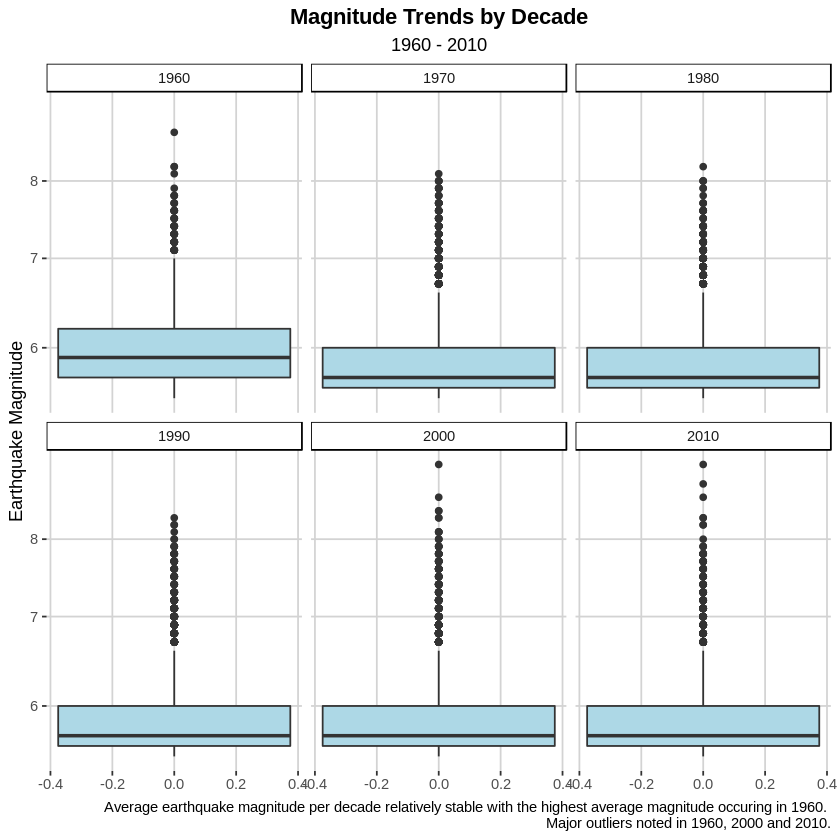

In [20]:
# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere

#png(filename="MagByDecade.png")

ggplot(mydata1) + geom_boxplot(aes(y=Magnitude), fill = 'lightblue') + facet_wrap(~Decade) + 

theme(strip.background = element_rect(colour = "black", fill = "white"), panel.background=element_rect(fill='white'),
panel.grid.major = element_line(colour = "lightgray"), plot.title = element_text(hjust = 0.5, face='bold'),
     plot.subtitle = element_text(hjust=0.5)) +

scale_y_log10() +
ggtitle(label = "Magnitude Trends by Decade", subtitle = '1960 - 2010') + 
ylab('Earthquake Magnitude') + 
labs(caption = 'Average earthquake magnitude per decade relatively stable with the highest average magnitude occuring in 1960. 
Major outliers noted in 1960, 2000 and 2010.')


# comment this out to see the plot in the notebook
#dev.off()

In [13]:
png(filename="MagvDepth.png")

ggplot(depth_trends) + 
geom_point(aes(x=Magnitude, y=ave_depth, alpha=0.2)) +
geom_smooth(aes(x=Magnitude, y=ave_depth), color='lightblue', se=FALSE) +

theme(strip.background = element_rect(colour = "black", fill = "white"), panel.background=element_rect(fill='white'),
panel.grid.major = element_line(colour = "lightgrey"), plot.title = element_text(hjust = 0.5, face='bold')) +
guides(alpha = 'none') +

ggtitle("Relationship Between Earthquake Magnitude and Depth") +
xlab('Magnitude') + ylab('Depth (km)') +
labs(caption = 'No clear relationship can be observed between earthquakes of lower relative magnitude (5-8).
Highest magnitude earthquakes observed (8-9), while more rare, seem to occur at depths closer to surface more often.')

dev.off()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


png 
  2

In [58]:
png(filename="Locations.png")

library(ggmap) 
world <- map_data("world")

ggplot() + 
geom_map(data=world, map=world, aes(long, lat, map_id=region), color='black', fill='#f2f2f2') +
geom_point(data=mydata1, aes(x=Longitude, y=Latitude, color=Magnitude, alpha=0.1)) +

theme(legend.position='bottom', panel.background=element_rect(fill='white'), 
      plot.title = element_text(hjust = 0.5, face = 'bold'), plot.subtitle=element_text(hjust=0.5)) + 
guides(alpha = 'none') + coord_equal() +
ggtitle('Locations of Recorded High Magnitude Earthquakes', subtitle= '1965-2007') + 
xlab("Longitude") + ylab("Latititude") +

scale_color_gradient(low = "lightblue", high = "darkblue")

dev.off()

Warning message:
“Ignoring unknown aesthetics: x, y”

png 
  2

In [15]:
png(filename='Density.png')

library(ggmap) 
world <- map_data("world")

ggplot() + 
geom_map(data=world, map=world, aes(long, lat, map_id=region), color='black', fill='#f2f2f2') +
geom_density2d(data=mydata1, aes(x=Longitude, y=Latitude), color = 'darkblue') +
stat_density2d(data=mydata1, aes(x=Longitude, y=Latitude, fill=..level.., alpha=..level..), geom='polygon') +
scale_fill_gradient(low = "lightblue", high = "darkblue") +

theme(legend.position='none', panel.background=element_rect(fill='white'), 
      plot.title = element_text(hjust = 0.5, face='bold'), plot.subtitle=element_text(hjust=0.5)) + 
guides(alpha = 'none') + coord_equal() +
ggtitle('Density of Recorded High Magnitude Earthquakes', subtitle= '1965-2007') + 
xlab("Longitude") + ylab("Latititude") +
labs(caption = 'Highest density earthquakes typically recorded where the Philippine Plate meets several others 
and in parts of the area known as the "Ring of Fire."')

dev.off()

Warning message:
“Ignoring unknown aesthetics: x, y”

png 
  2

---

# Common Pitfalls / Inefficiencies

**Pay attention to the following in your visualizations and stories:**


### Color coordinate among plots so that the same data attributes have the same color in all plots

you can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value. 


### Perceptual grouping is important! group and/or order values

In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

Pie chart: order wedges. 

In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 


### No lengthy text in x axis

Flip the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

at least put them slanted in x axis for better readibility. 


### Plot only those that tell an obvious story

**No crowded** scatter plots with useless linear regression lines that don't tell anything. Look at alternative plots to tell your story.


### If you have too many classes (discrete variables/categories), try to group them 

Instead of giving a color to each of them, you can put them in meaningful groups and color code.

For sequential variables, you can do the same thing by binning. 

Stepped color palettes may be more useful than smooth sequential palettes (especially for comparison in choropleth maps).

You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 


### ANNOTATE!

**Tell** your audience what they are supposed to see. 

Use meaningful titles with a message, not dry titles. 

Use nice and concise axis labels. 

Use text annotations (look at the **examples in the lab notebook**).



### THEMING!

**Good looking** charts are more **convincing**. 

**Almost NEVER use the default color palette, default theme, default font.**


Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 



### Use space wisely!

**Balance the plots** to use space effectively.

Pay attention to data-ink ratio.

HAVE A FLOW left to right, top to bottom. 


